In [3]:
import pandas as pd; # type: ignore
import numpy as np; # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [4]:
storedata=pd.read_csv("D:/Final Project/Retail-Sales-Markdown-Prediction-Using-ANN-with-TensorFlow--AWS-Deployment/stores_data_set.csv")
storedata.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
salesdata=pd.read_csv("D:/Final Project/Retail-Sales-Markdown-Prediction-Using-ANN-with-TensorFlow--AWS-Deployment/sales_data_set.csv")
salesdata.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
featuredata=pd.read_csv("D:/Final Project/Retail-Sales-Markdown-Prediction-Using-ANN-with-TensorFlow--AWS-Deployment/Features_data_set.csv")
featuredata

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
storedata.shape,salesdata.shape,featuredata.shape

((45, 3), (421570, 5), (8190, 12))

In [8]:
storedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
featuredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
merger=pd.merge(storedata,salesdata,on=['Store'],how="left")
merger

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [12]:
df=pd.merge(merger,featuredata,on=["Store","Date","IsHoliday"])
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,B,118221,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,B,118221,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,B,118221,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [13]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [16]:
columns = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df[columns] = df[columns].fillna(0)

In [17]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,A,151315,1,12/02/2010,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,A,151315,1,19/02/2010,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,A,151315,1,26/02/2010,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,A,151315,1,05/03/2010,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,B,118221,98,05/10/2012,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,B,118221,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,B,118221,98,19/10/2012,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [19]:
df["Date"]=pd.to_datetime(df["Date"],format="%d/%m/%Y")

In [20]:
df["Day"] = df["Date"].dt.day
df["Week"]=df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [21]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,5,2,2010
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,12,6,2,2010
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,19,7,2,2010
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,26,8,2,2010
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,39,9,2012
421566,45,B,118221,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,40,10,2012
421567,45,B,118221,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,41,10,2012
421568,45,B,118221,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,42,10,2012


In [22]:
df1= df.copy()
df1

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,5,2,2010
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,12,6,2,2010
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,19,7,2,2010
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,26,8,2,2010
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,39,9,2012
421566,45,B,118221,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,40,10,2012
421567,45,B,118221,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,41,10,2012
421568,45,B,118221,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,42,10,2012


In [23]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Size,421570.0,136727.915739,34875.0,93638.0,140167.0,202505.0,219622.0,60980.583328
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
MarkDown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
MarkDown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453


In [24]:
Weekly_sales=df1.groupby("Date")["Weekly_Sales"].sum().reset_index()
Weekly_sales

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


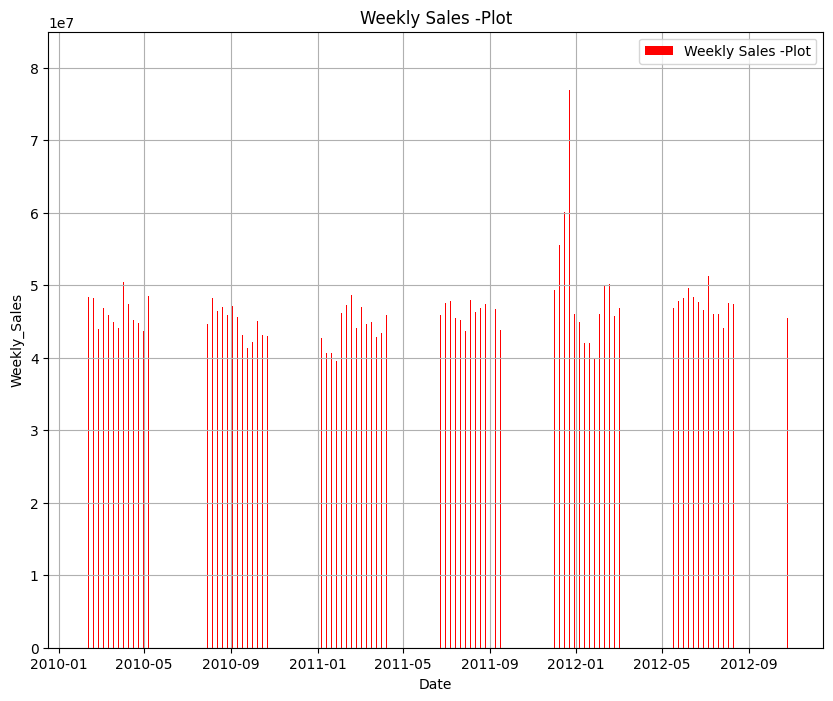

In [25]:
plt.figure(figsize=(10,8))
plt.bar(Weekly_sales["Date"], Weekly_sales["Weekly_Sales"], color="red",label="Weekly Sales -Plot")
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.title("Weekly Sales -Plot")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
Sales_count_by_type = df1.groupby("Type")["Weekly_Sales"].count().reset_index()
Sales_count_by_type

,Type,Weekly_Sales
0,A,215478
1,B,163495
2,C,42597


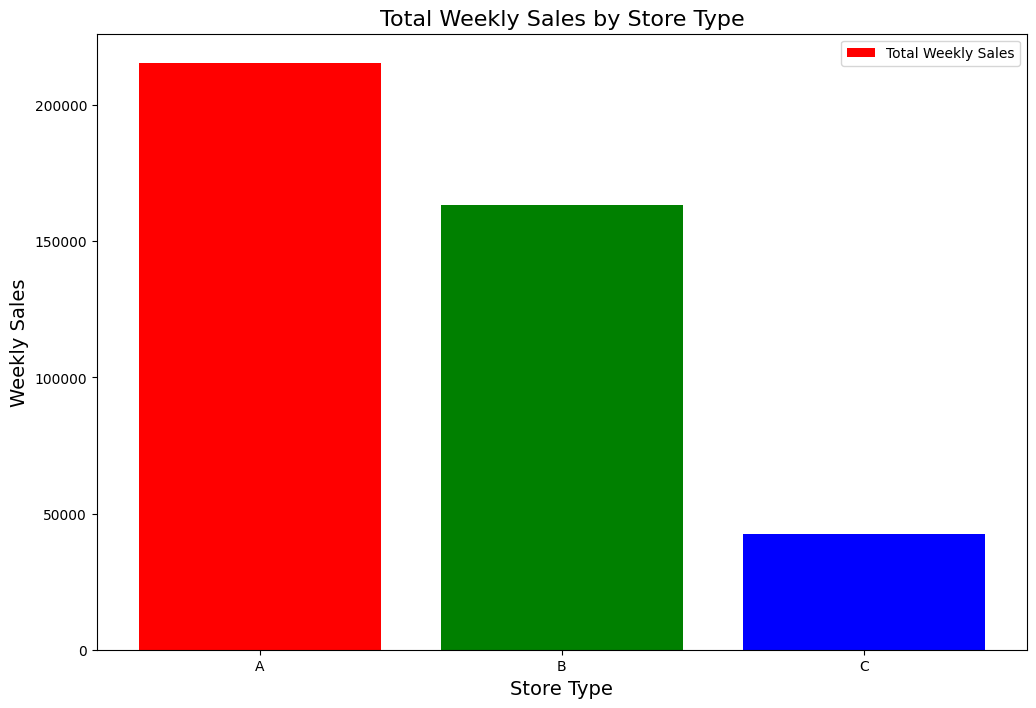

In [27]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(12,8))
plt.bar(Sales_count_by_type["Type"], Sales_count_by_type["Weekly_Sales"], color=colors, label="Total Weekly Sales")
plt.xlabel("Store Type", fontsize=14)
plt.ylabel("Weekly Sales", fontsize=14)
plt.title("Total Weekly Sales by Store Type", fontsize=16)
plt.legend()

In [28]:
Average_sales_size=df1.groupby("Size")["Weekly_Sales"].mean().reset_index()
Average_sales_size.head()

,Size,Weekly_Sales
0,34875,5053.415813
1,37392,6373.033983
2,39690,8262.936295
3,39910,8297.715353
4,41062,13415.114118


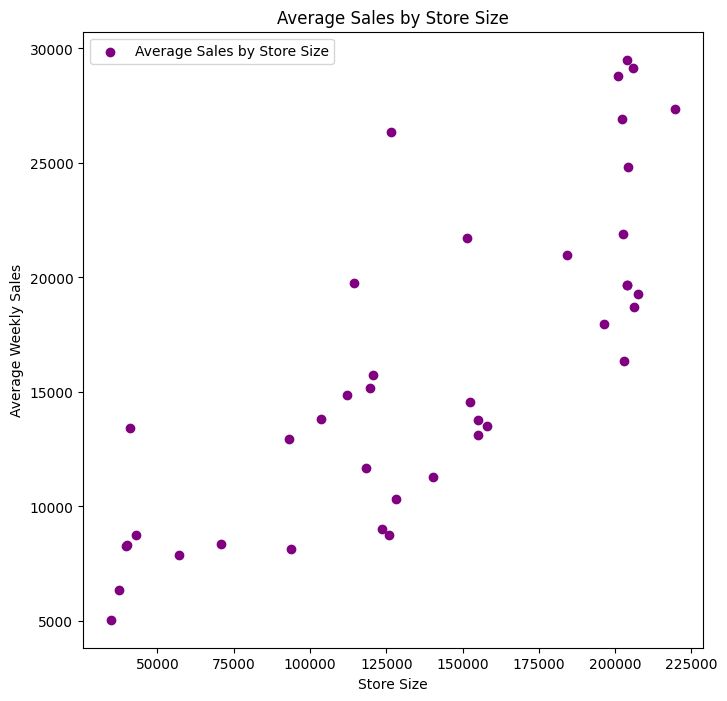

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(Average_sales_size["Size"],Average_sales_size["Weekly_Sales"],color="purple",label="Average Sales by Store Size")
plt.xlabel("Store Size")
plt.ylabel("Average Weekly Sales")
plt.title("Average Sales by Store Size")
plt.legend()
plt.show()

In [30]:
df_a=df1[df1['Type']=='A']
df_a.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,5,2,2010
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,12,6,2,2010
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,19,7,2,2010
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,26,8,2,2010
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,5,9,3,2010


In [31]:
Dept_sales_a=df_a.groupby("Dept")["Weekly_Sales"].mean()
Dept_sales_a.head()

Dept
1    22956.887886
2    51994.674873
3    13881.033137
4    32973.814075
5    26803.448045
Name: Weekly_Sales, dtype: float64

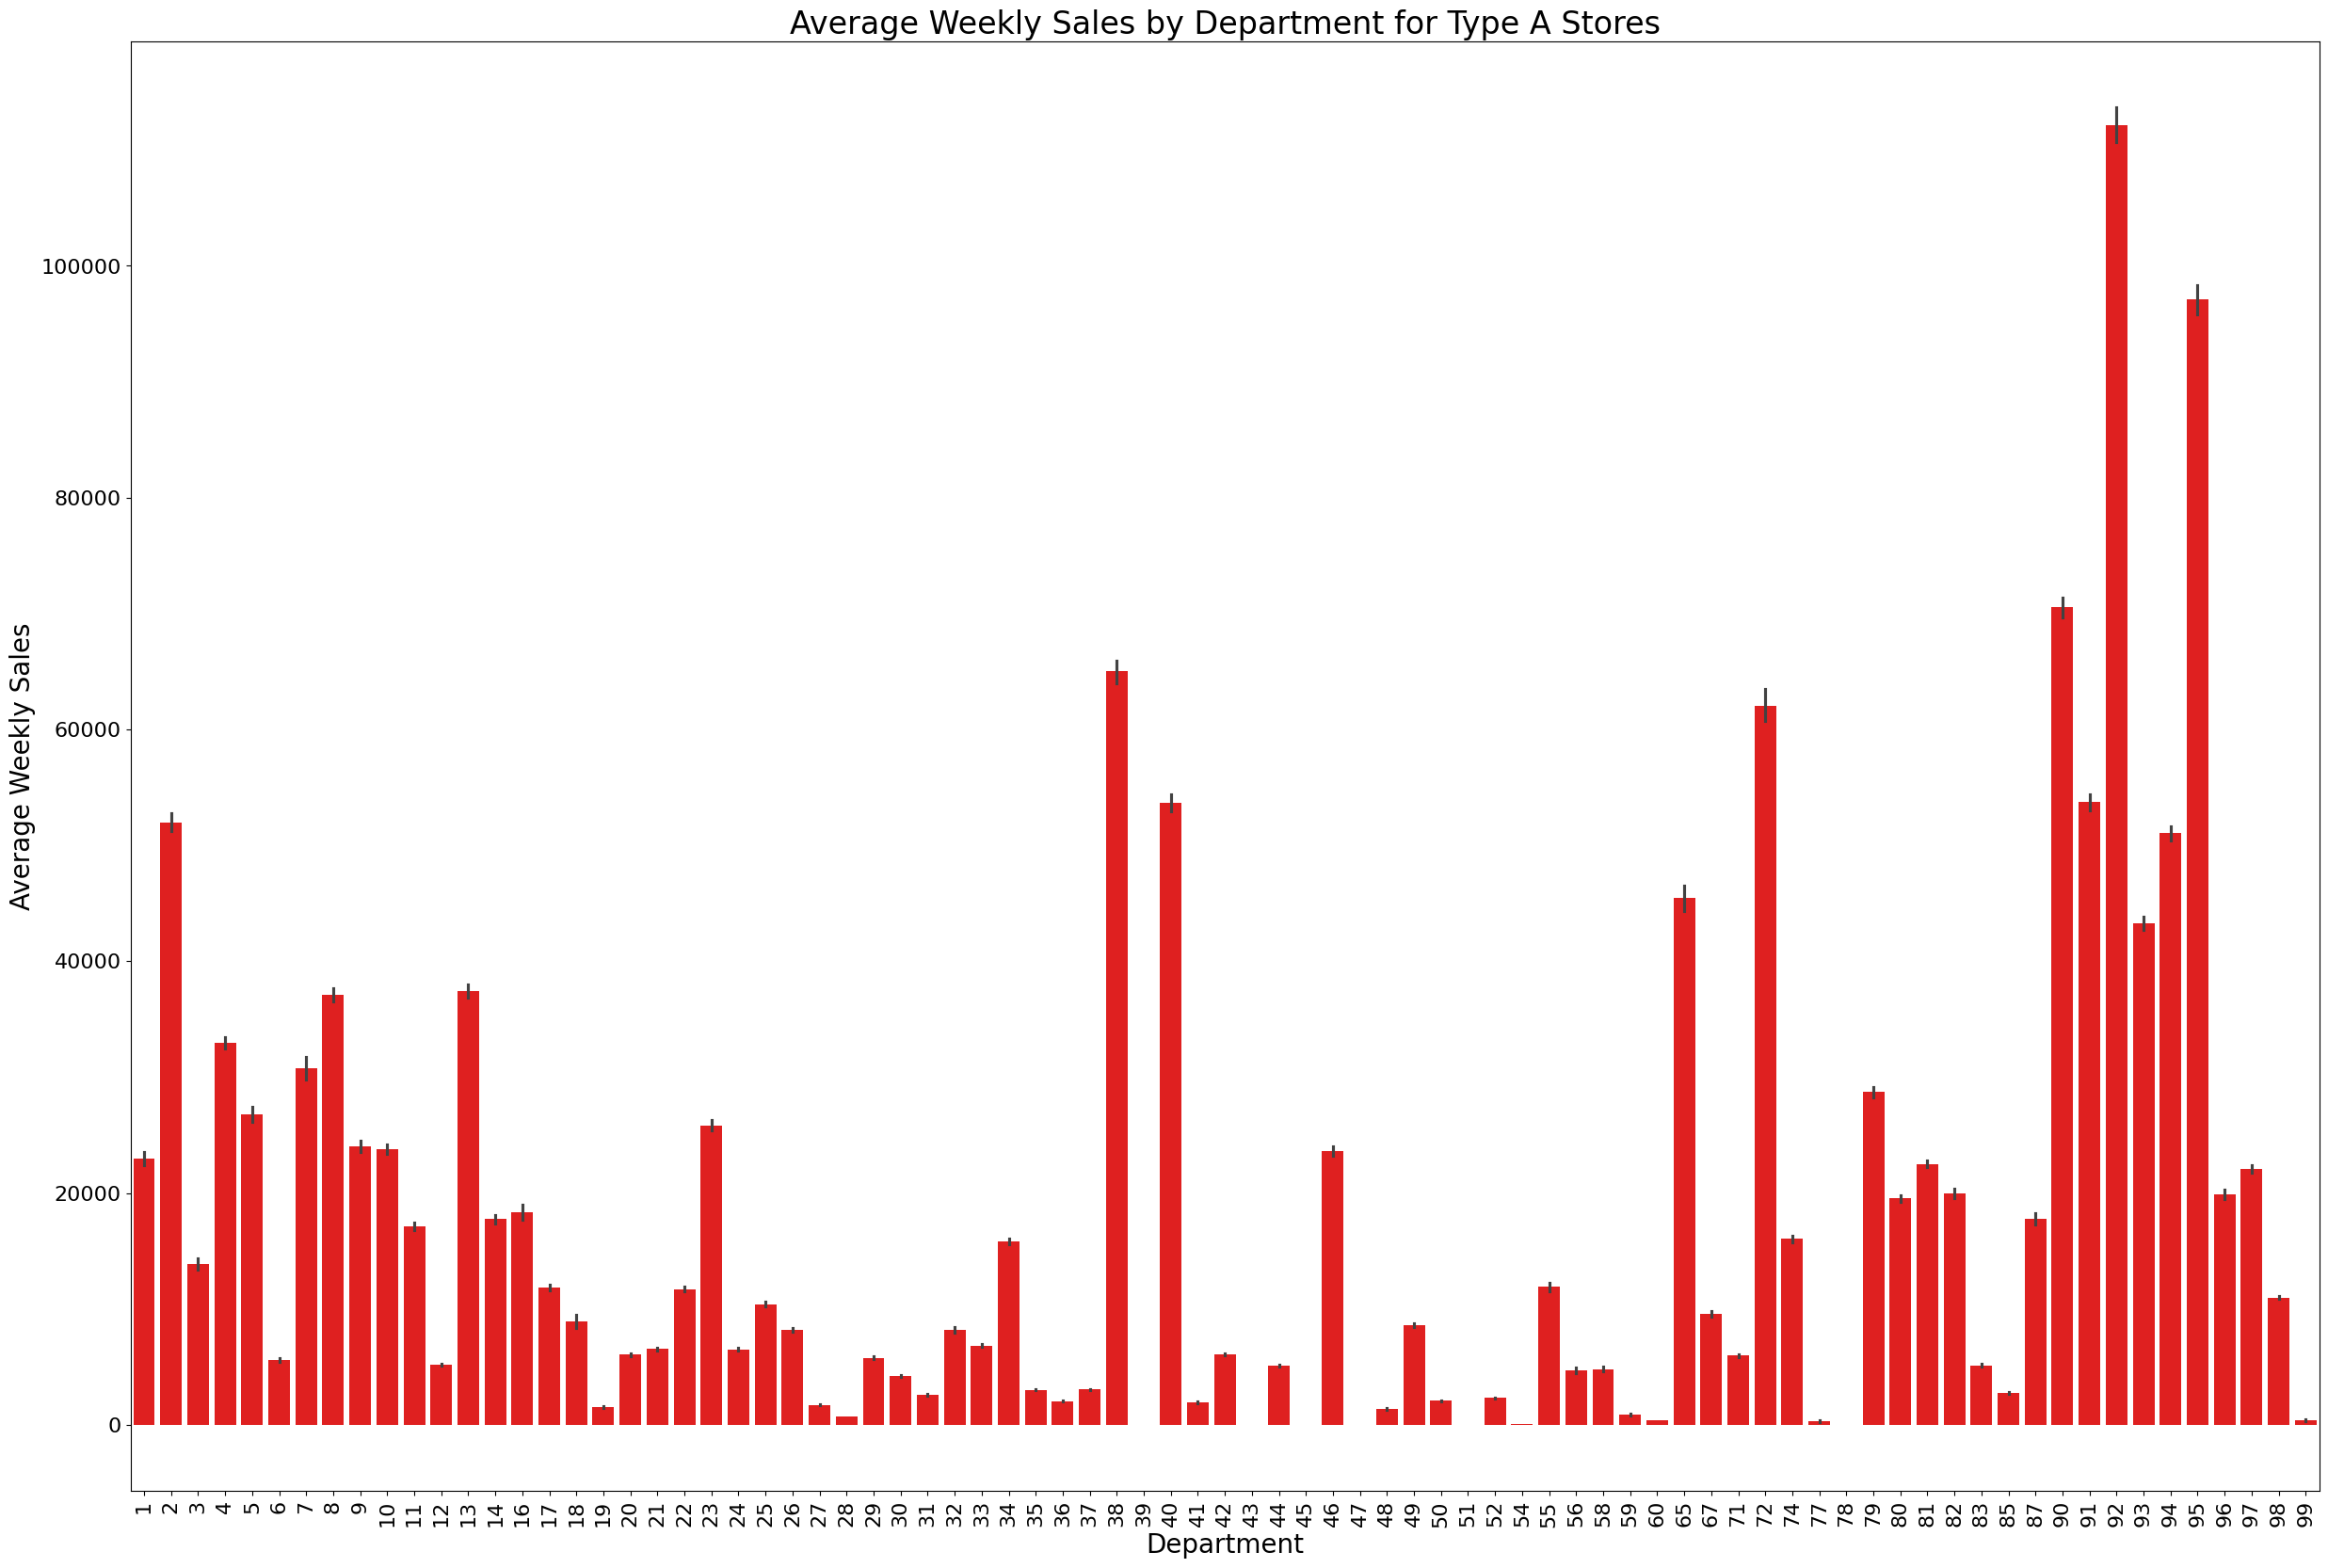

In [32]:
plt.figure(figsize=(30,20))
sns.barplot(x='Dept', y='Weekly_Sales', data=df_a, estimator=np.mean, color='red')
plt.xlabel('Department', fontsize=20)
plt.ylabel('Average Weekly Sales', fontsize=20)
plt.title('Average Weekly Sales by Department for Type A Stores', fontsize=24)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

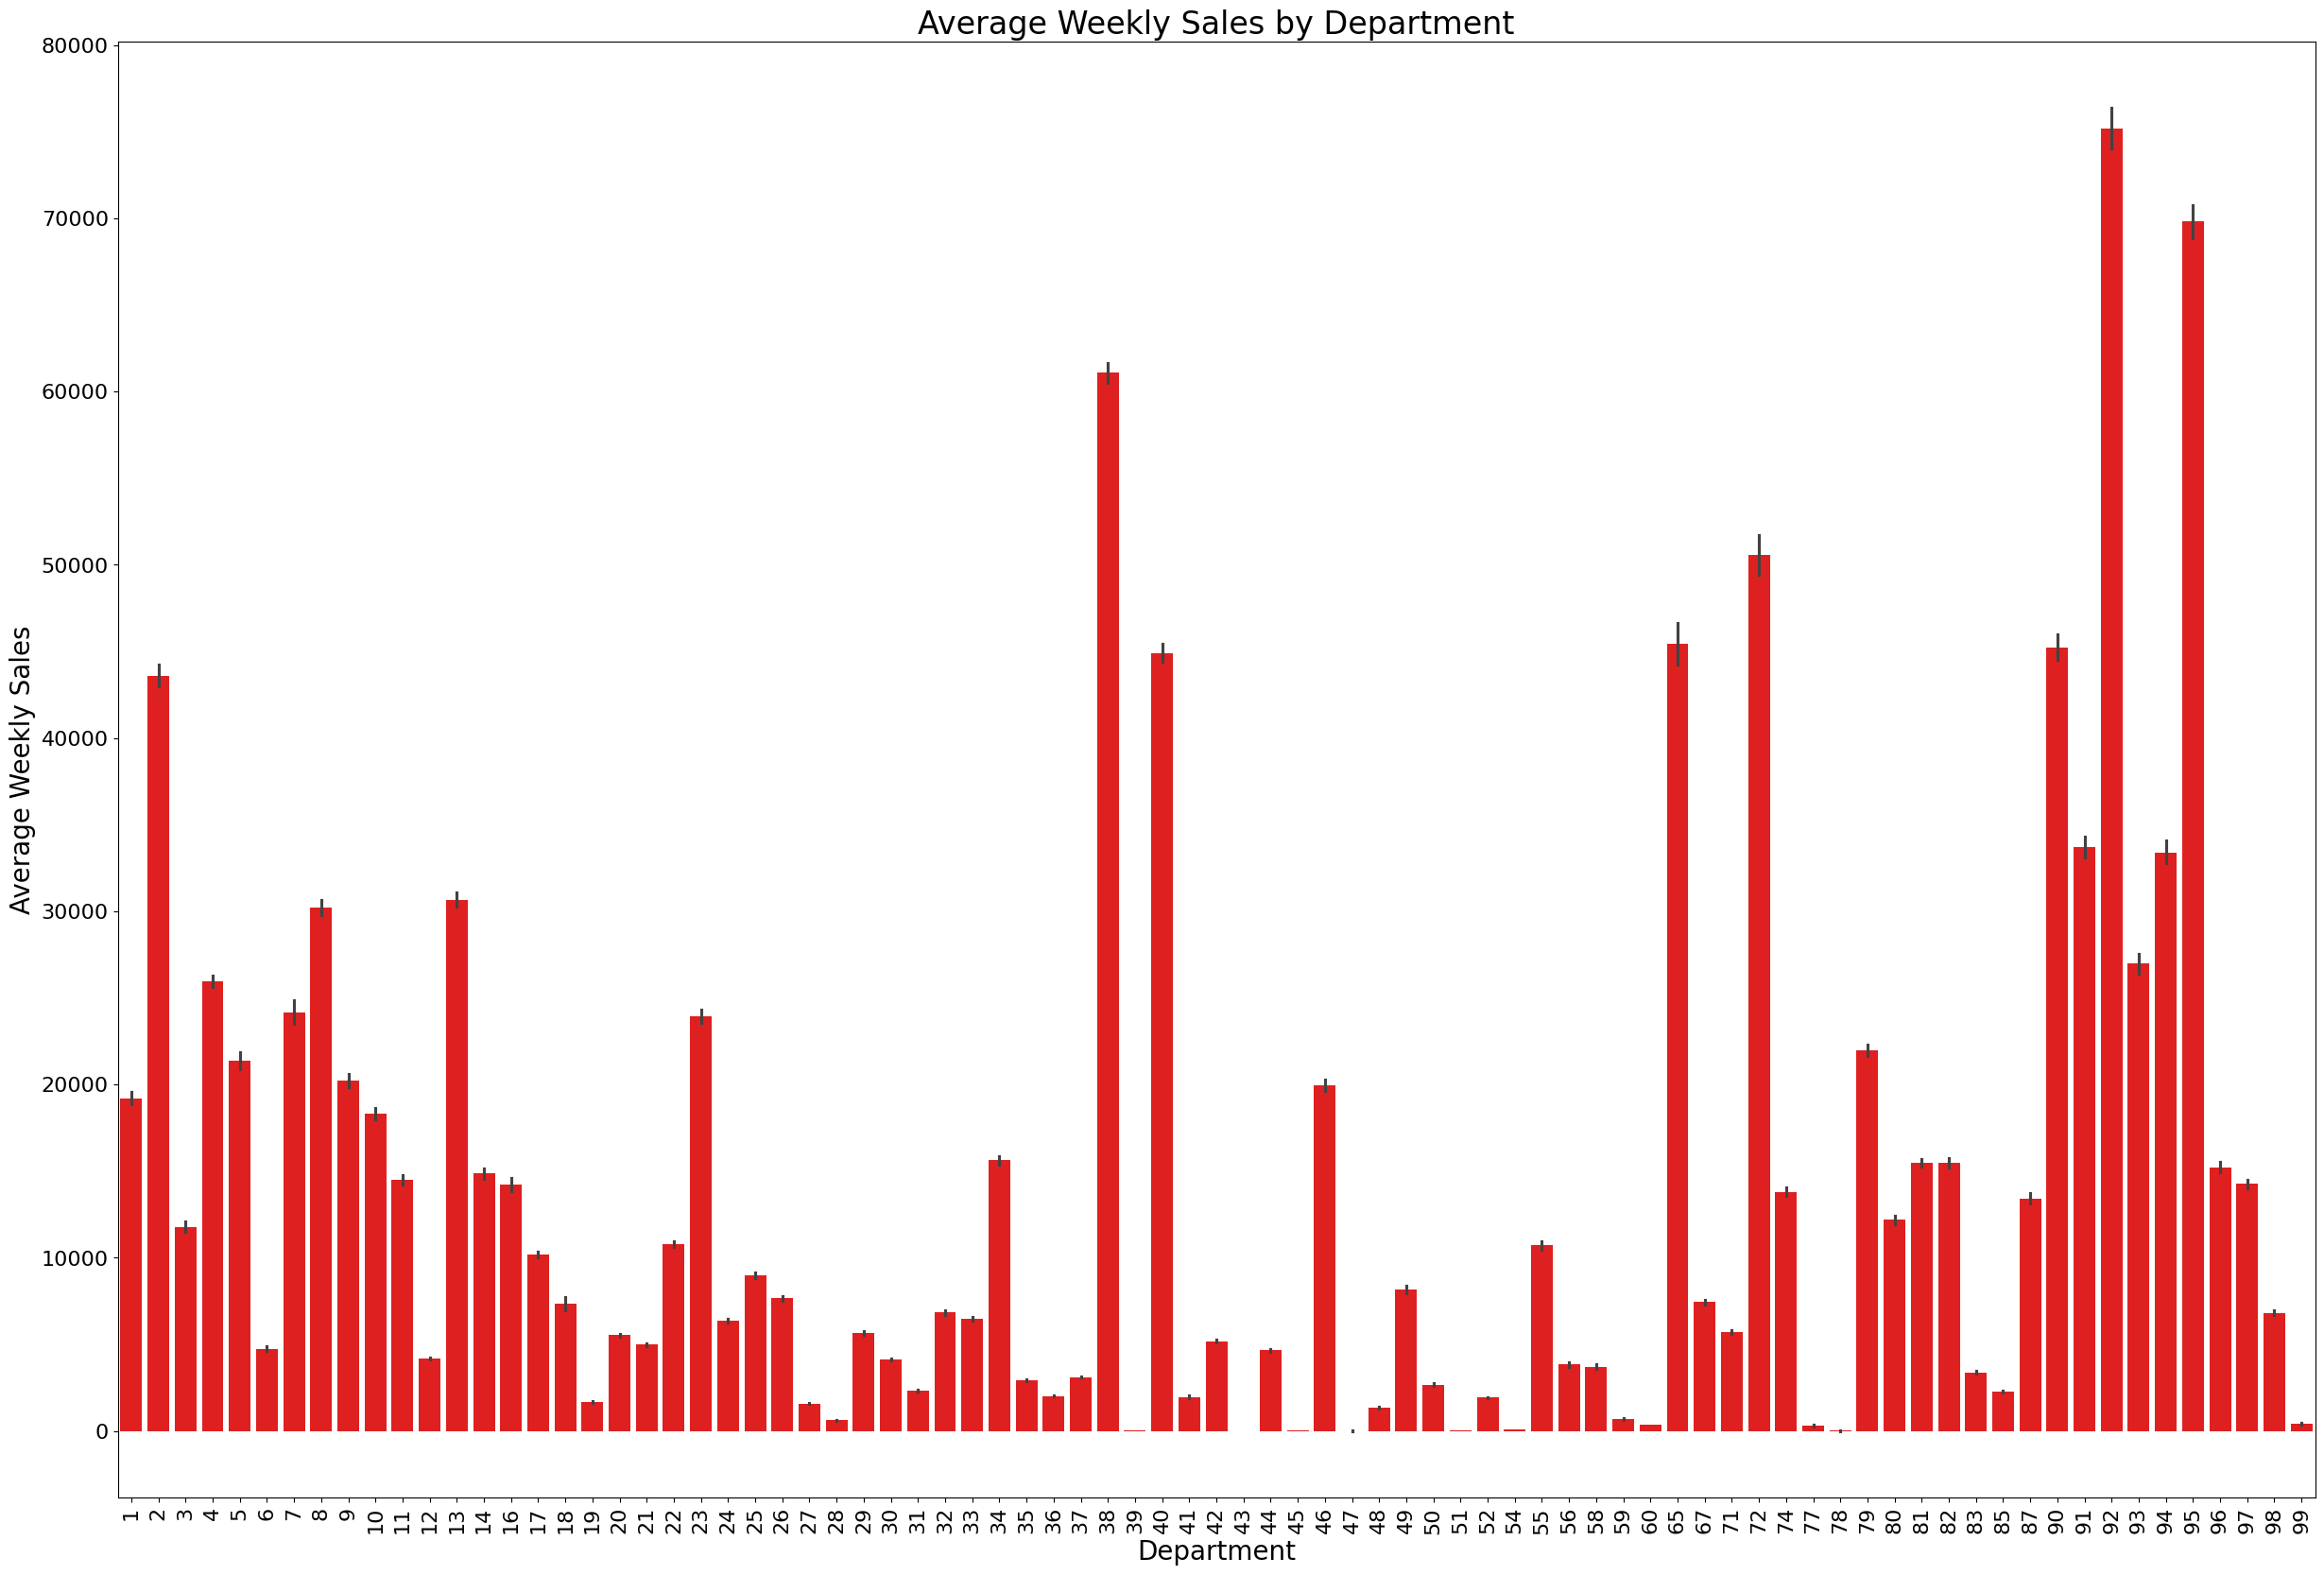

In [33]:
plt.figure(figsize=(30,20))
sns.barplot(x='Dept', y='Weekly_Sales', data=df1, estimator=np.mean, color='red')
plt.xlabel('Department', fontsize=20)
plt.ylabel('Average Weekly Sales', fontsize=20)
plt.title('Average Weekly Sales by Department', fontsize=24)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [34]:
Holiday_sales=df1.groupby("IsHoliday")["Weekly_Sales"].mean().reset_index()
Holiday_sales

,IsHoliday,Weekly_Sales
0,False,15901.445069
1,True,17035.823187


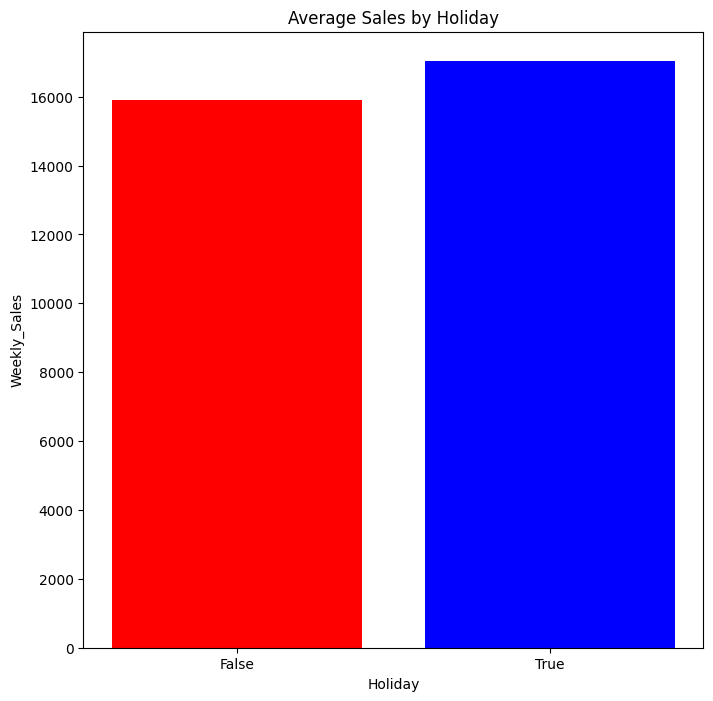

In [35]:
colors = ['red', 'blue']
plt.figure(figsize=(8,8))
plt.bar(Holiday_sales["IsHoliday"],Holiday_sales["Weekly_Sales"],color=colors)
plt.xticks(ticks=[0,1],labels=["False","True"])
plt.xlabel("Holiday")
plt.ylabel("Weekly_Sales")
plt.title("Average Sales by Holiday")
plt.show()

In [36]:
df1.groupby("Month")["Weekly_Sales"].mean()

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

In [37]:
df1.groupby("Year")["Weekly_Sales"].mean()

Year
2010    16270.275737
2011    15954.070675
2012    15694.948597
Name: Weekly_Sales, dtype: float64

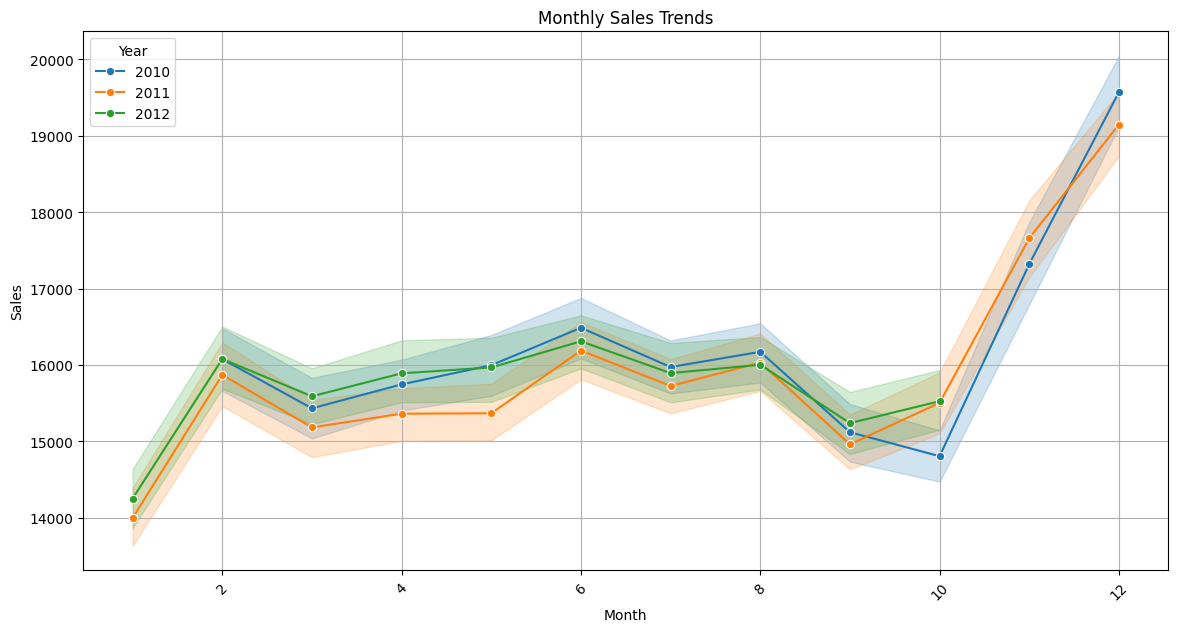

In [38]:
palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Month', y='Weekly_Sales', hue='Year', marker='o',palette=palette)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

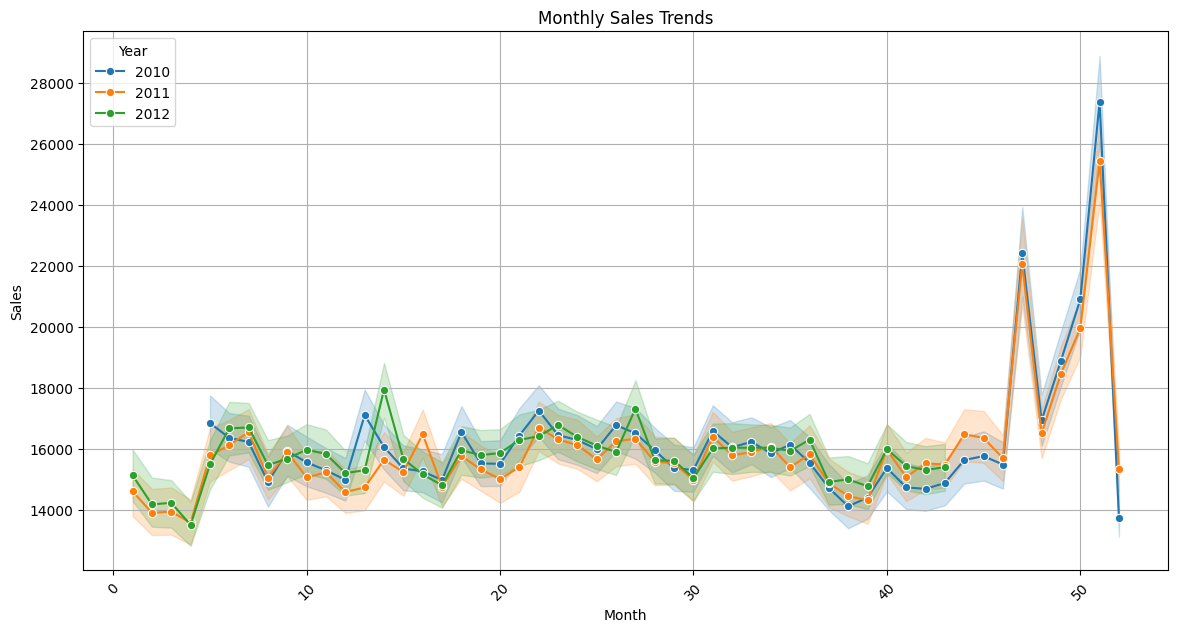

In [39]:
palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Week', y='Weekly_Sales', hue='Year', marker='o',palette=palette)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [40]:
def plot(df,column):
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.histplot(data= df1,x=column,kde=True,bins=30,color='red')
    plt.title(f'Distribution Plot for {column}')
    plt.show

    plt.subplot(1,3,2)
    sns.boxplot(data= df1,x=column,color='orange')
    plt.title(f'Box Plot for {column}')
    plt.show

    plt.subplot(1,3,3)
    sns.violinplot(data=df1,x=column,color='blue')
    plt.title(f'Violin Plot for {column}')
    plt.show

In [41]:
df1.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Week', 'Month',
       'Year'],
      dtype='object')

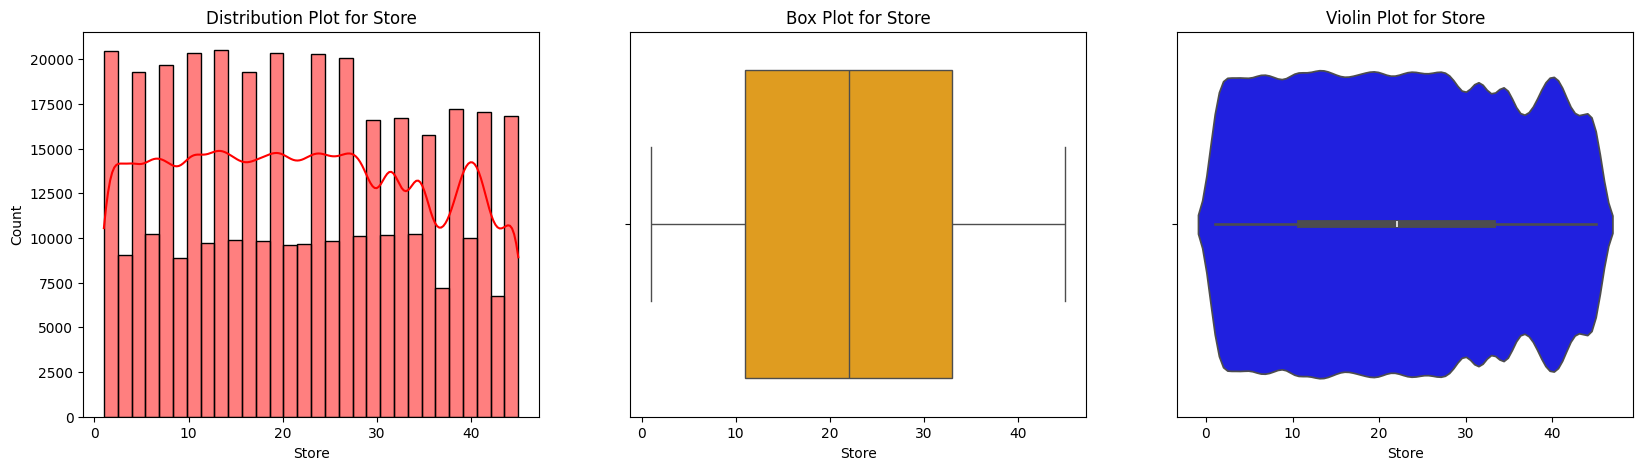

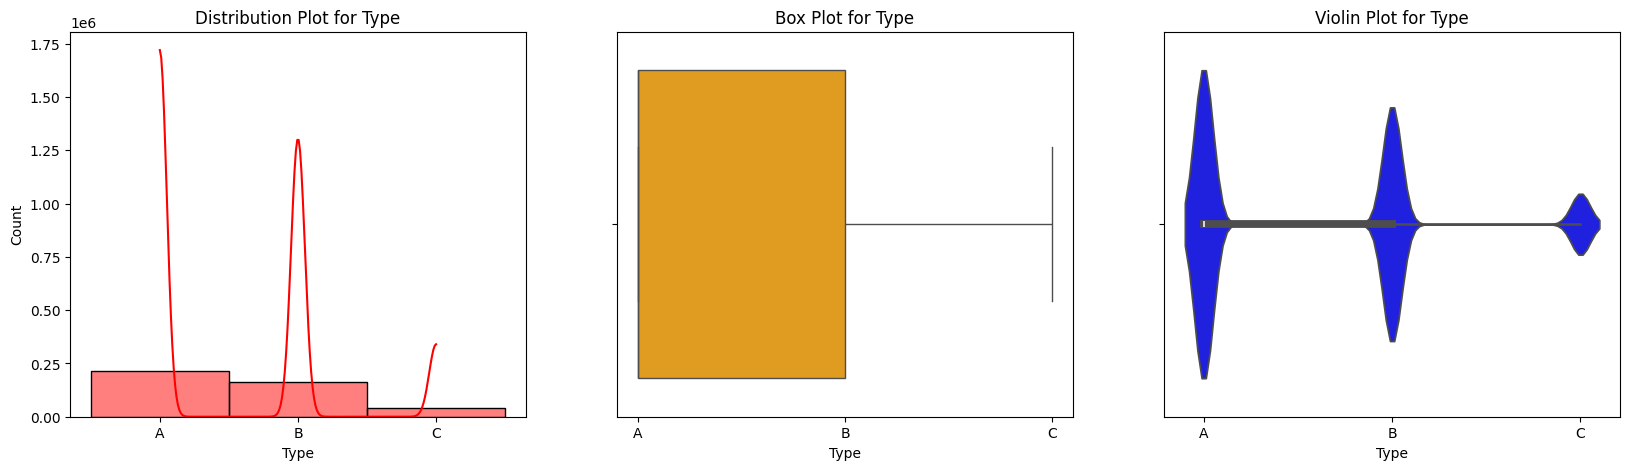

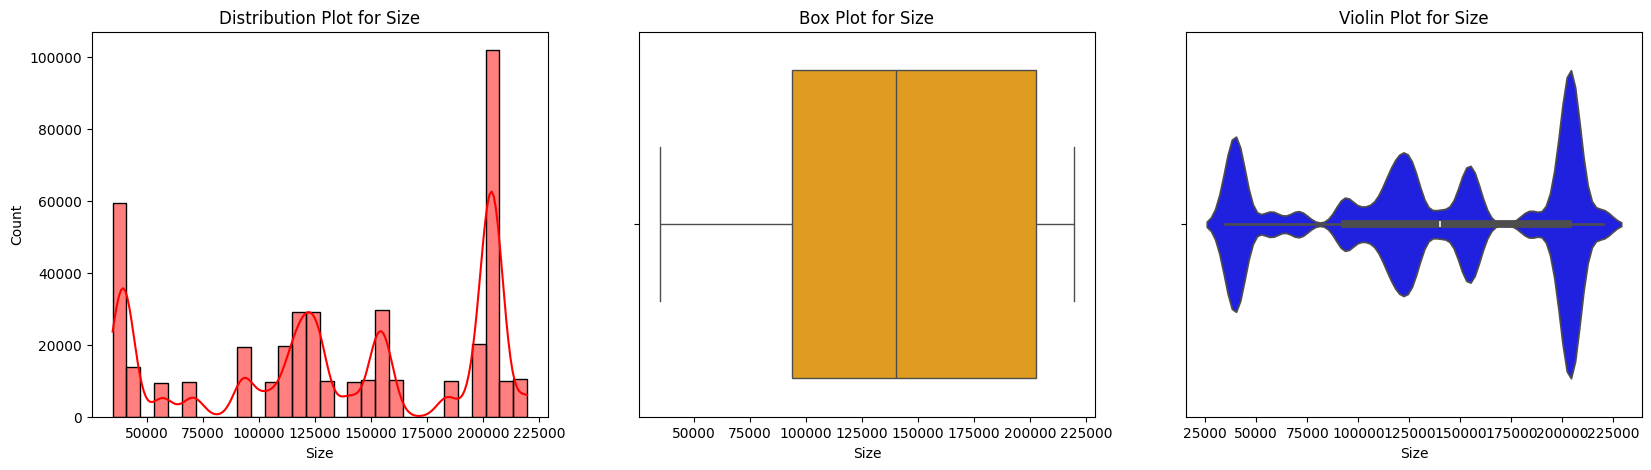

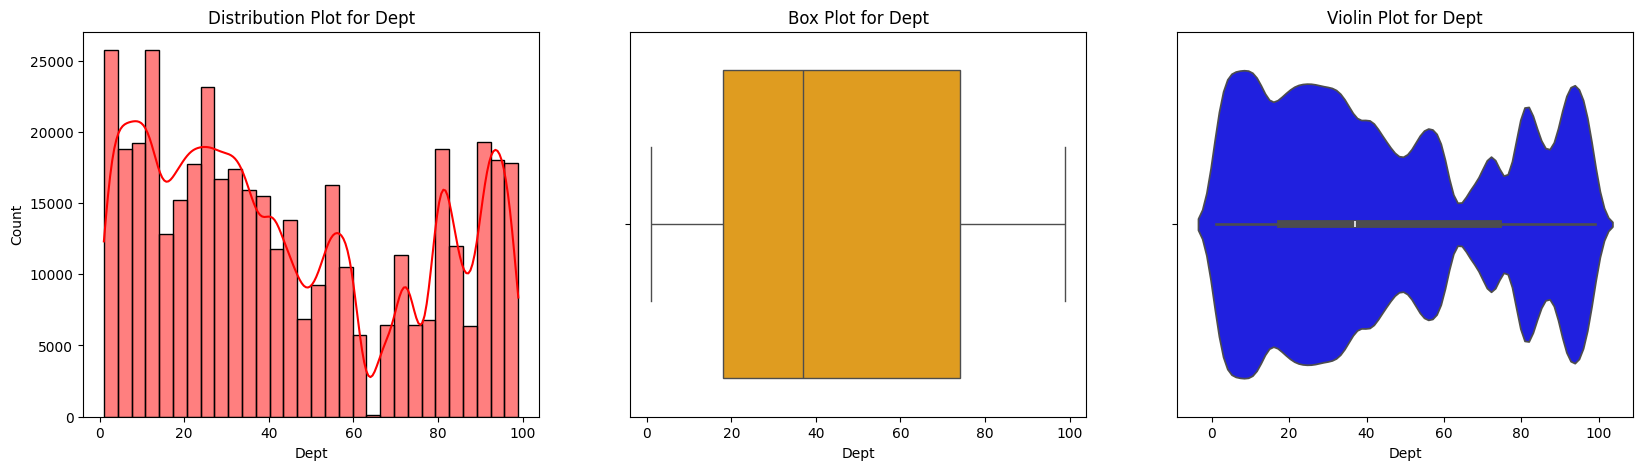

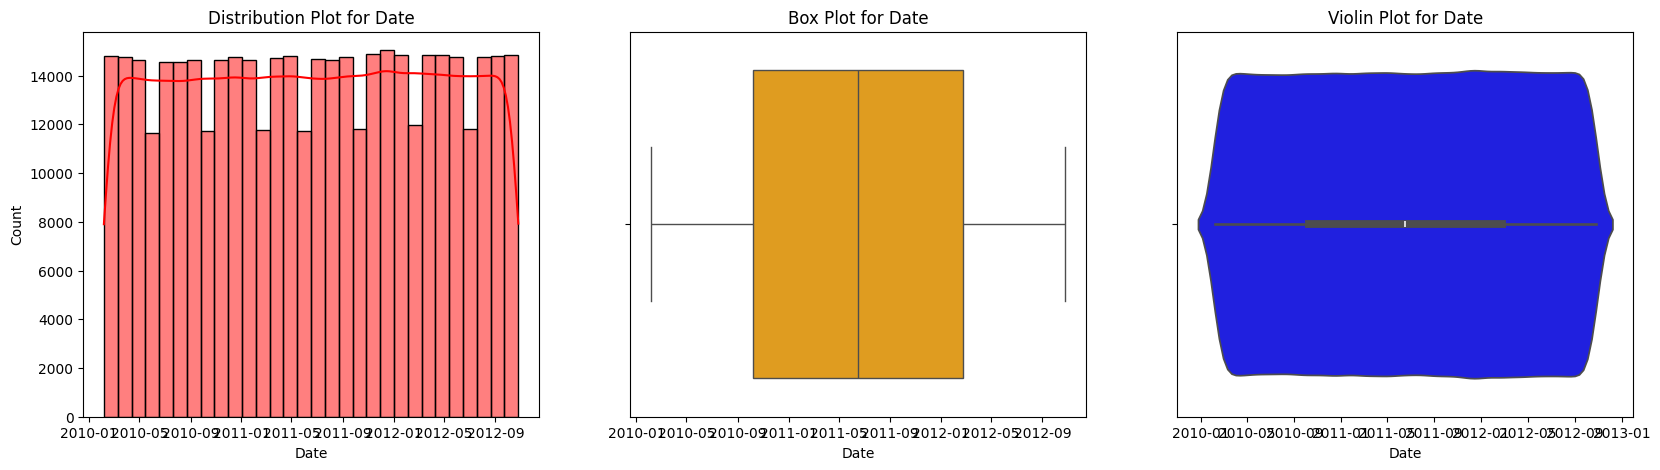

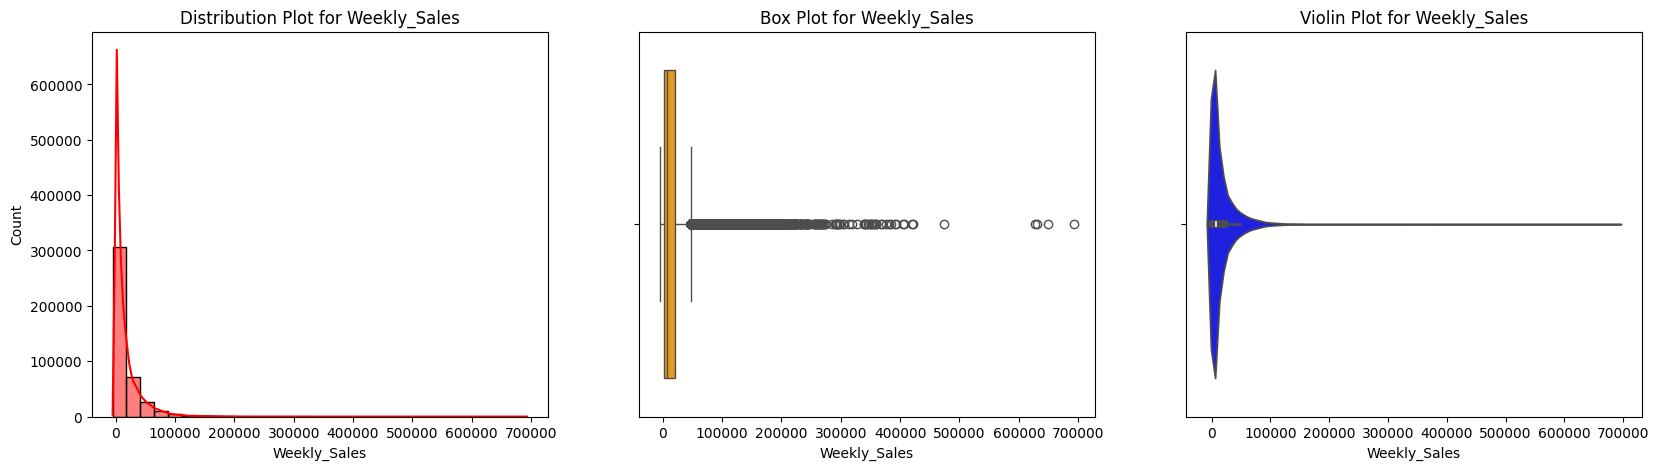

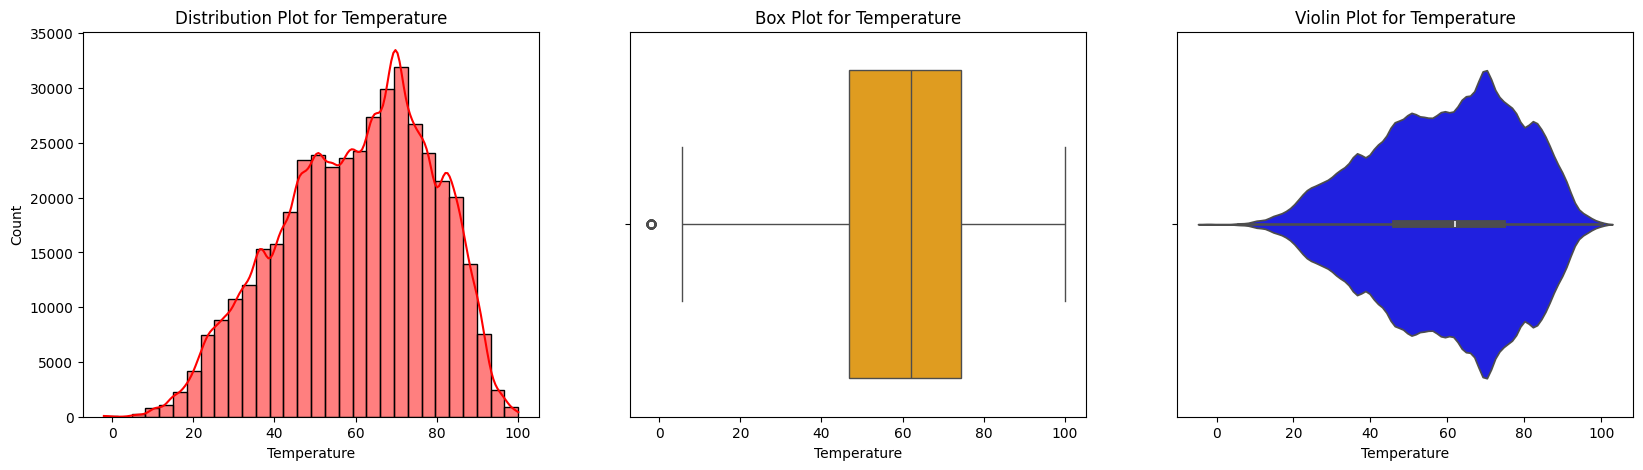

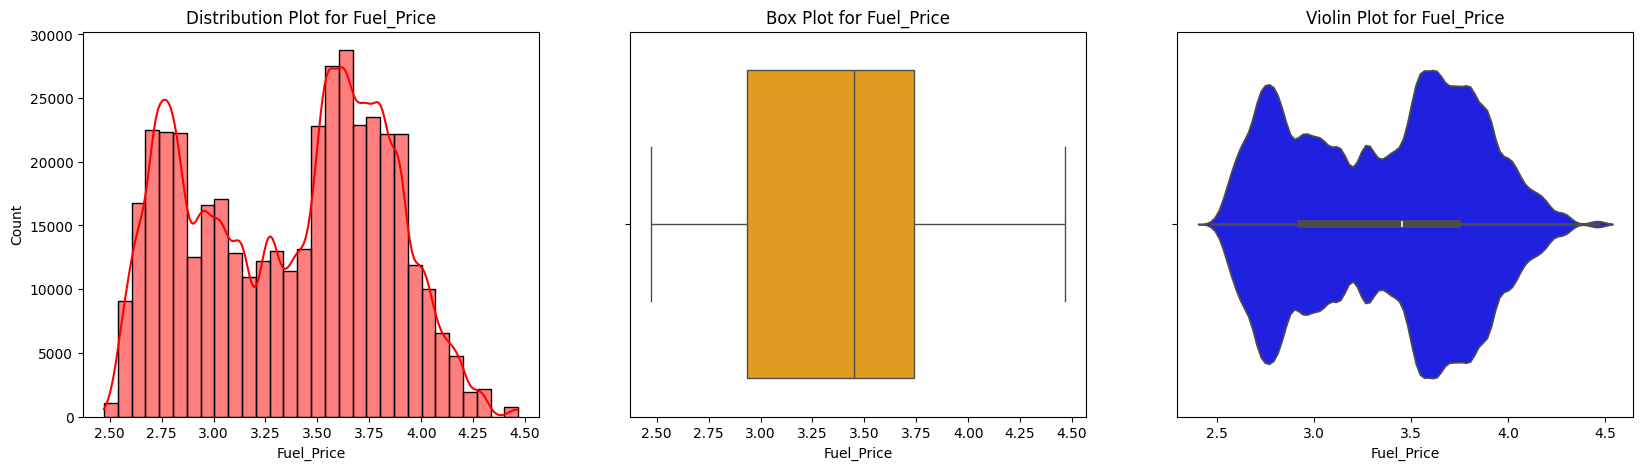

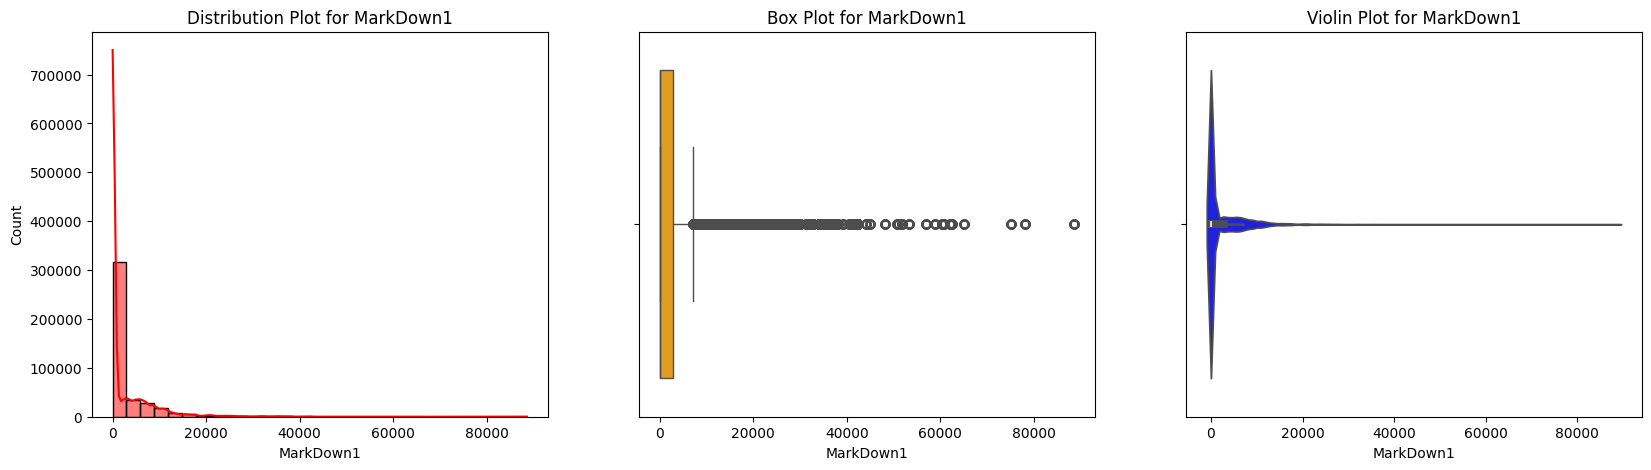

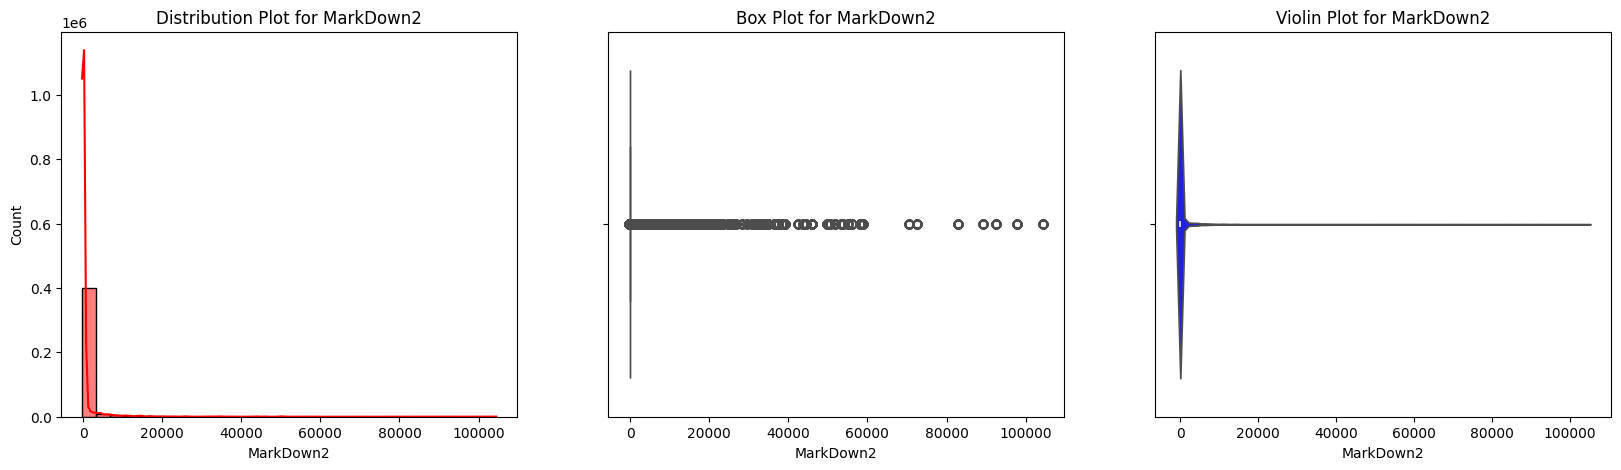

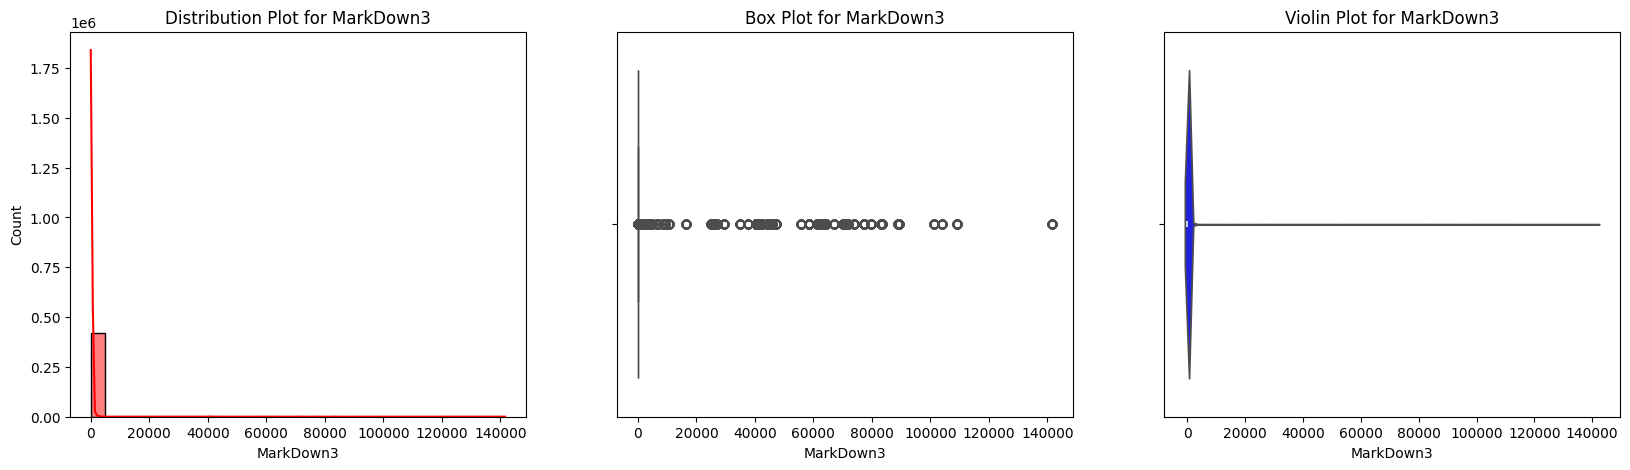

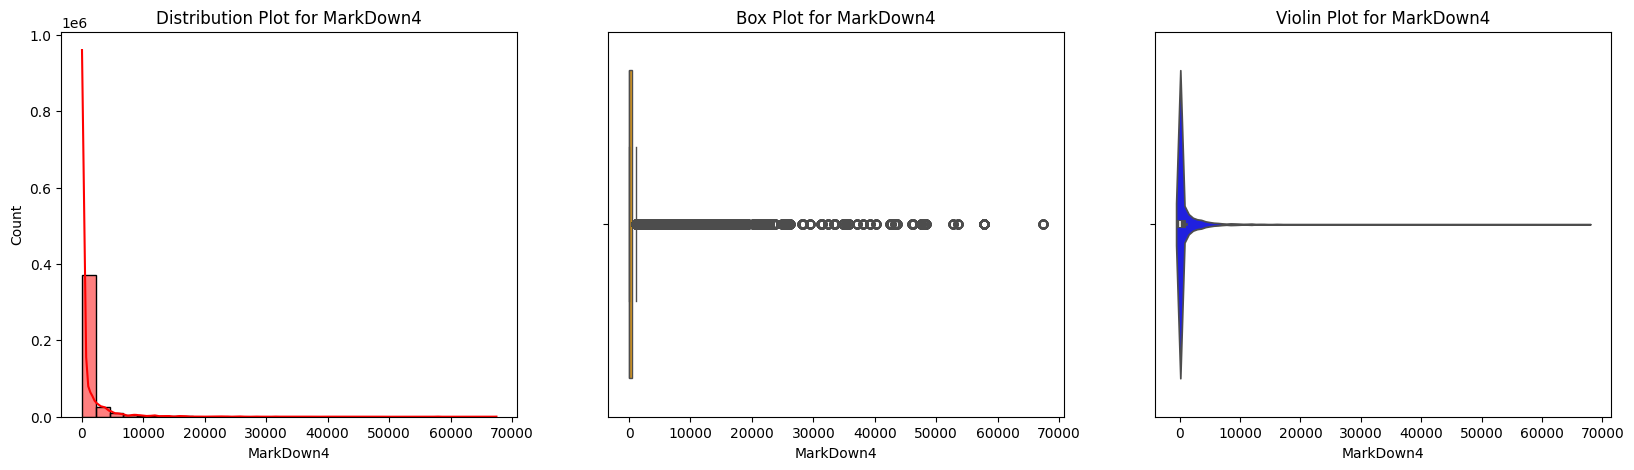

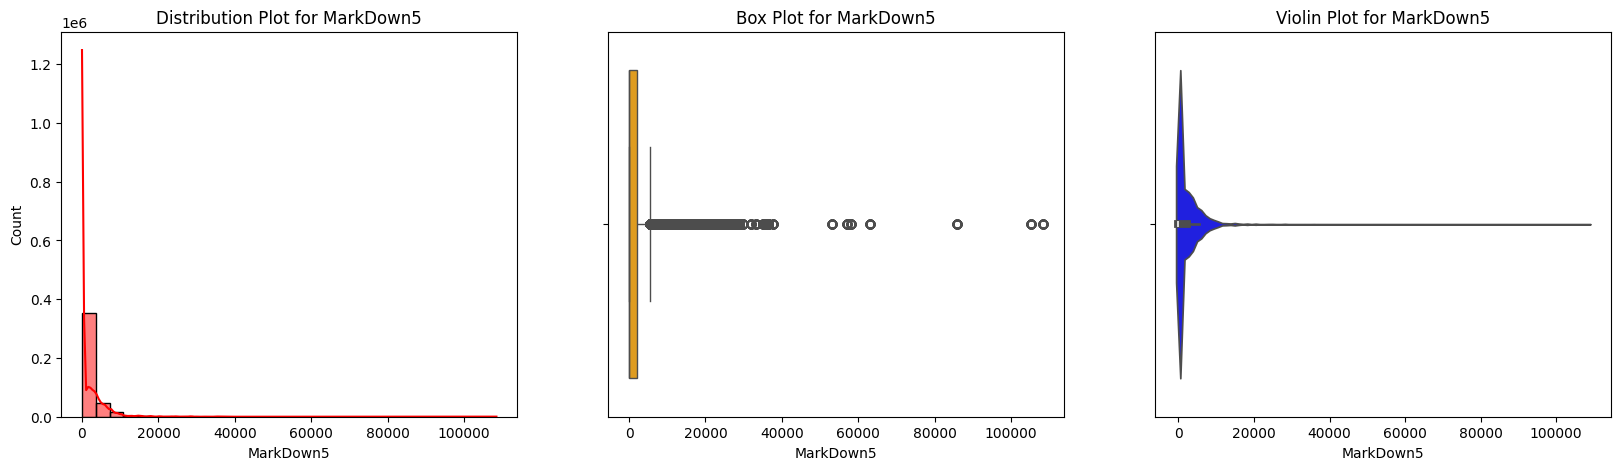

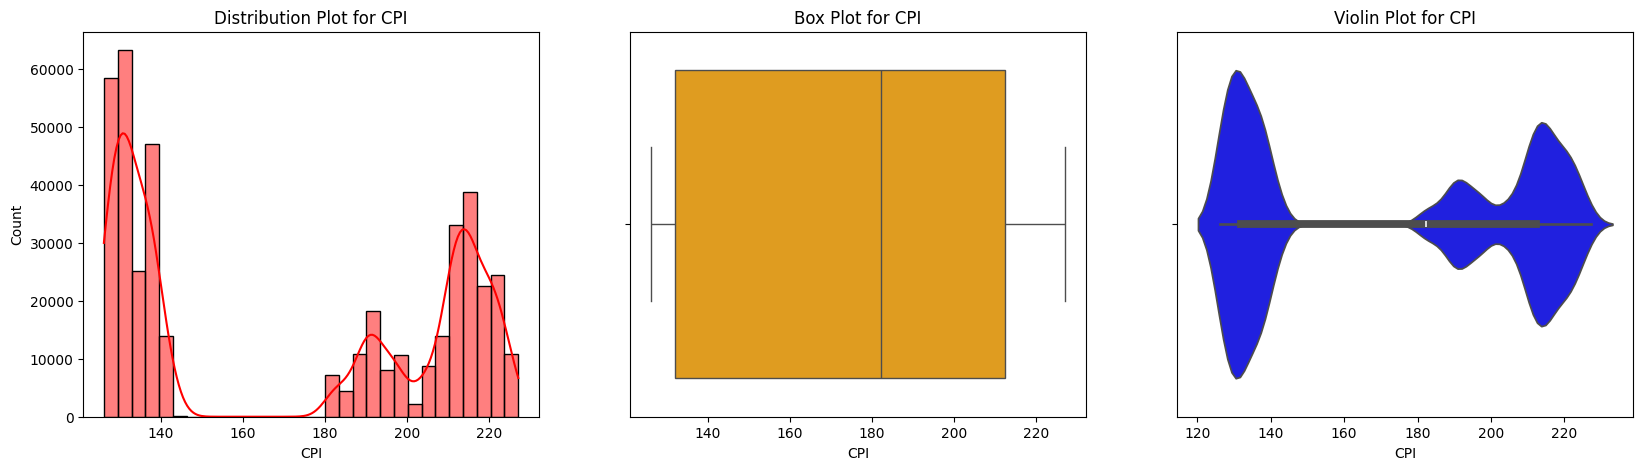

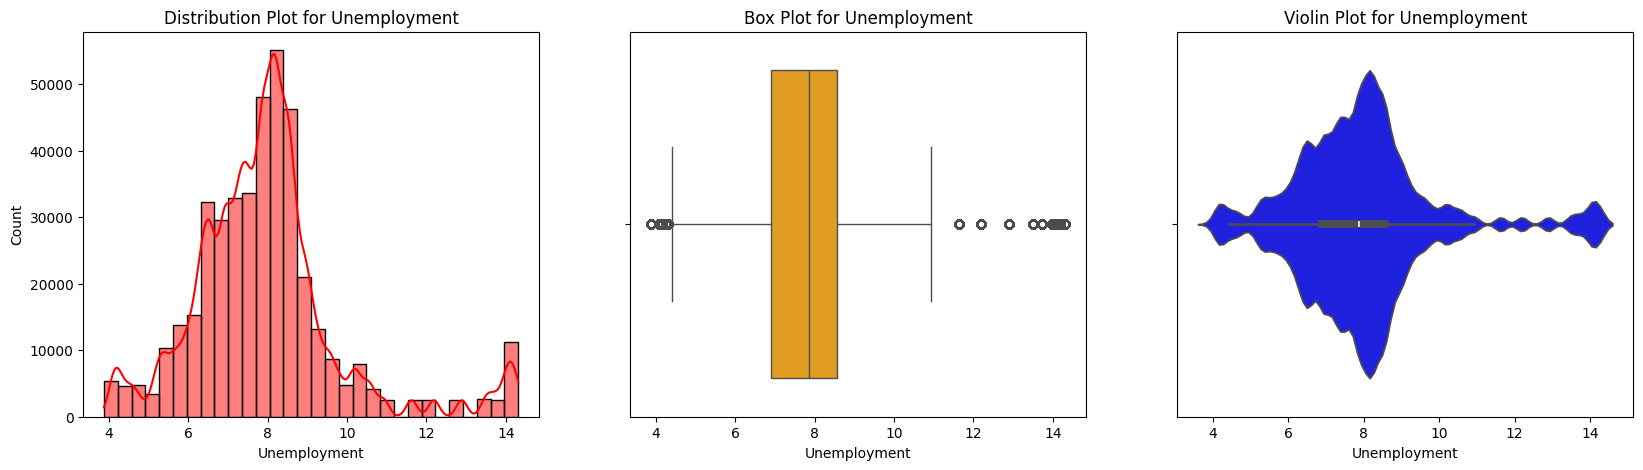

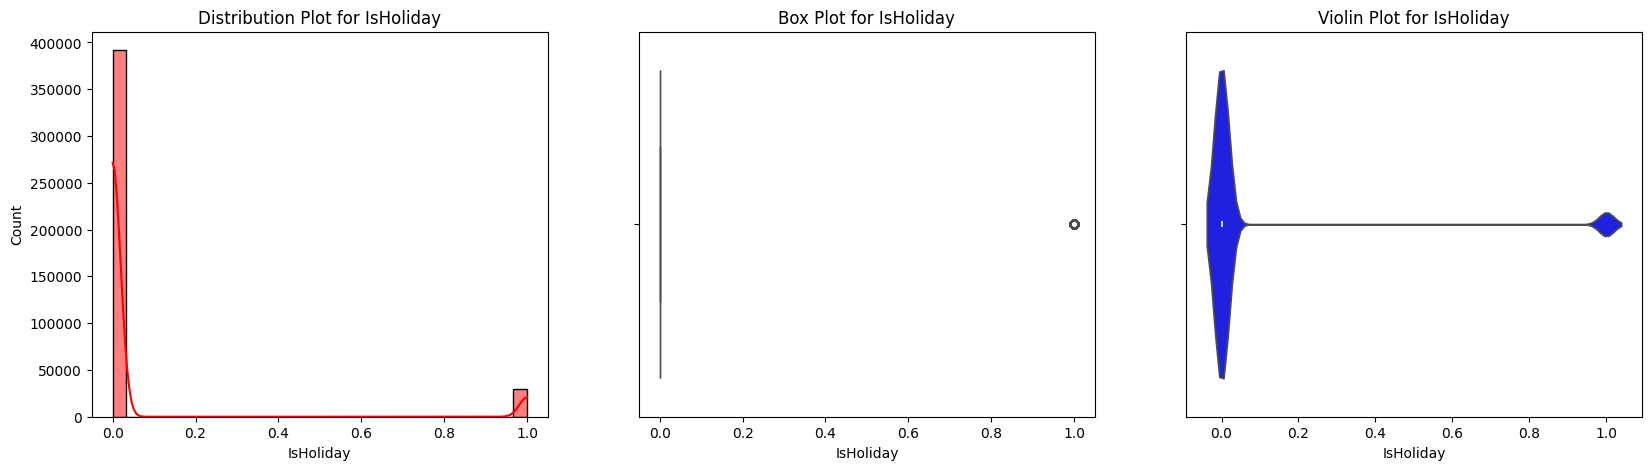

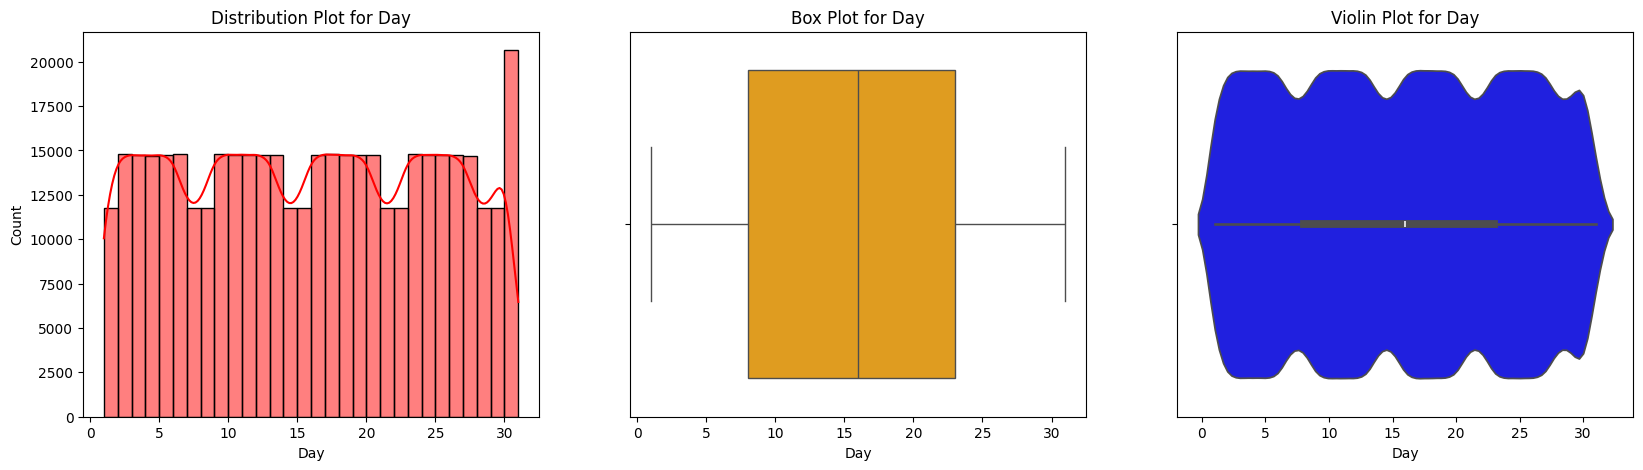

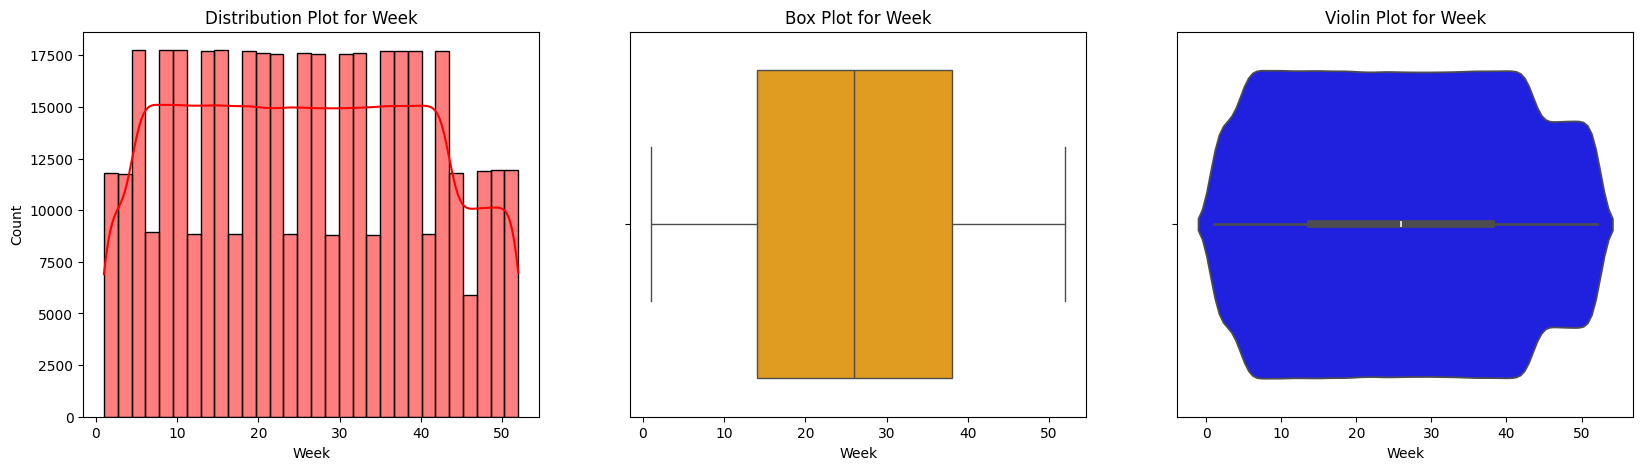

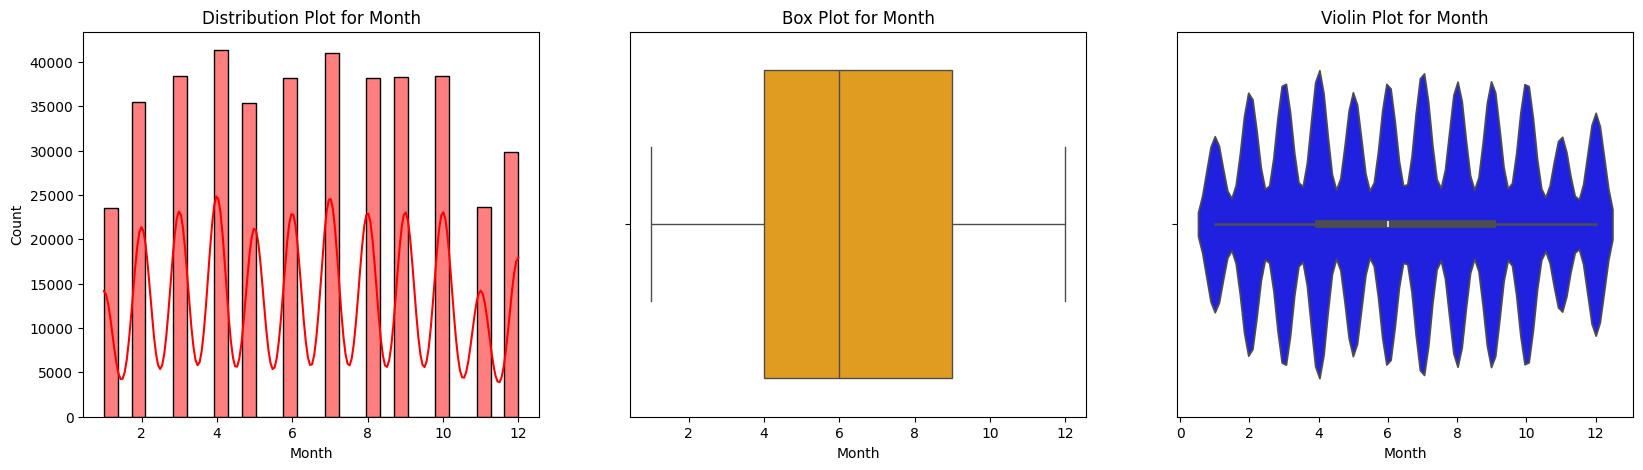

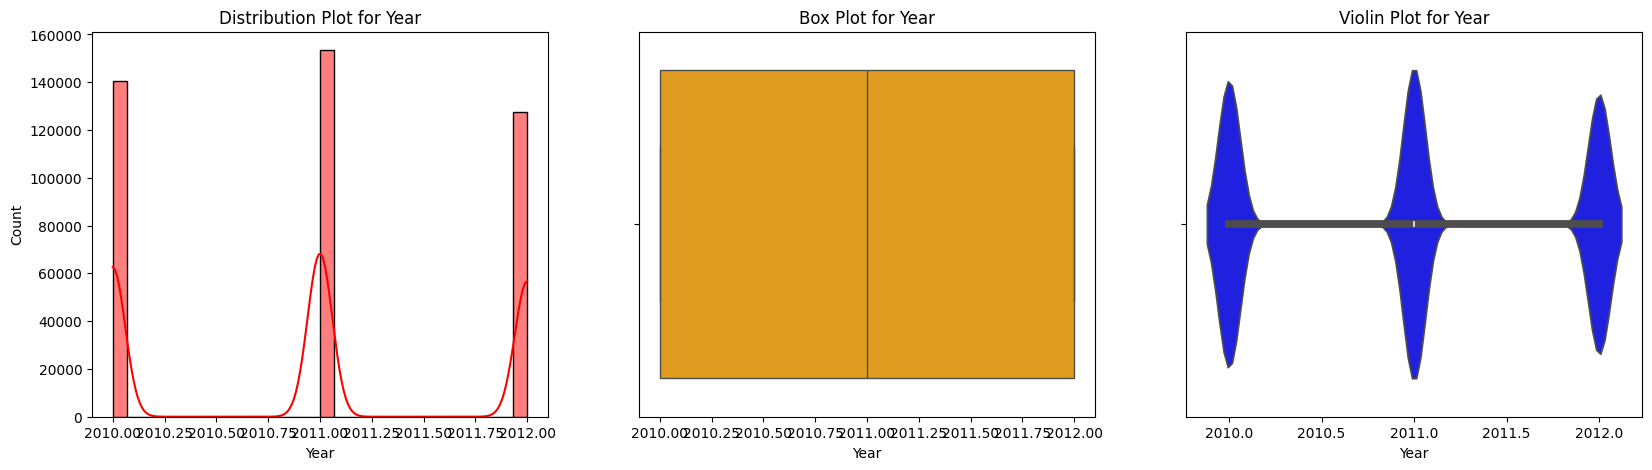

In [42]:
# plotting to check skew
for col in ['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Week', 'Month',
       'Year']:
    plot(df1,col)

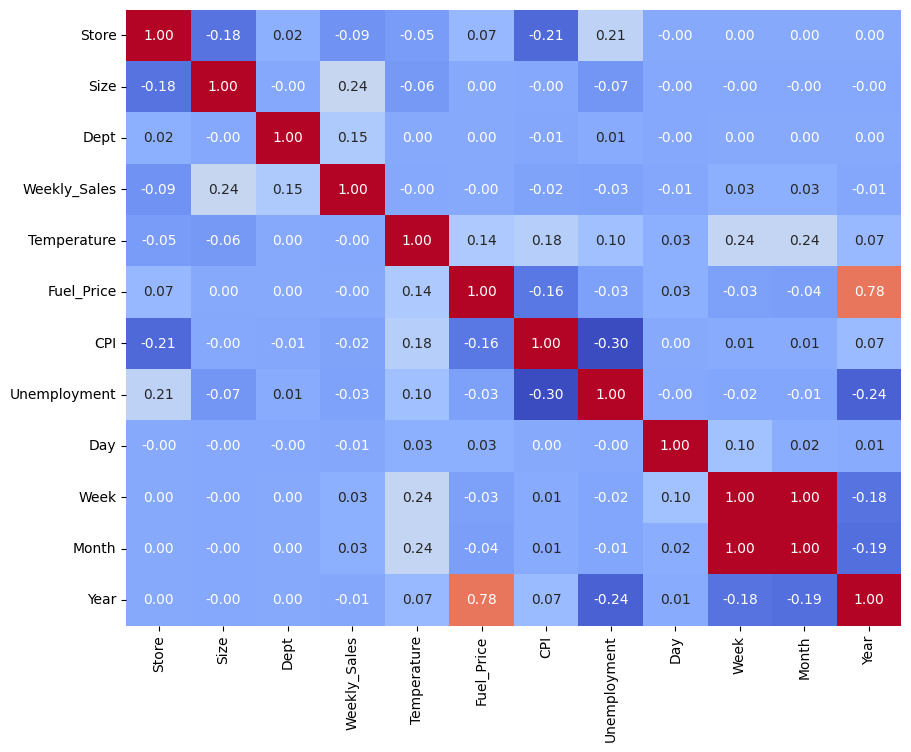

In [43]:
numerical_columns=["Store","Size","Dept","Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment","Day","Week","Month","Year"]
corr=df1[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2f',cbar=False,cmap='coolwarm')
plt.show()

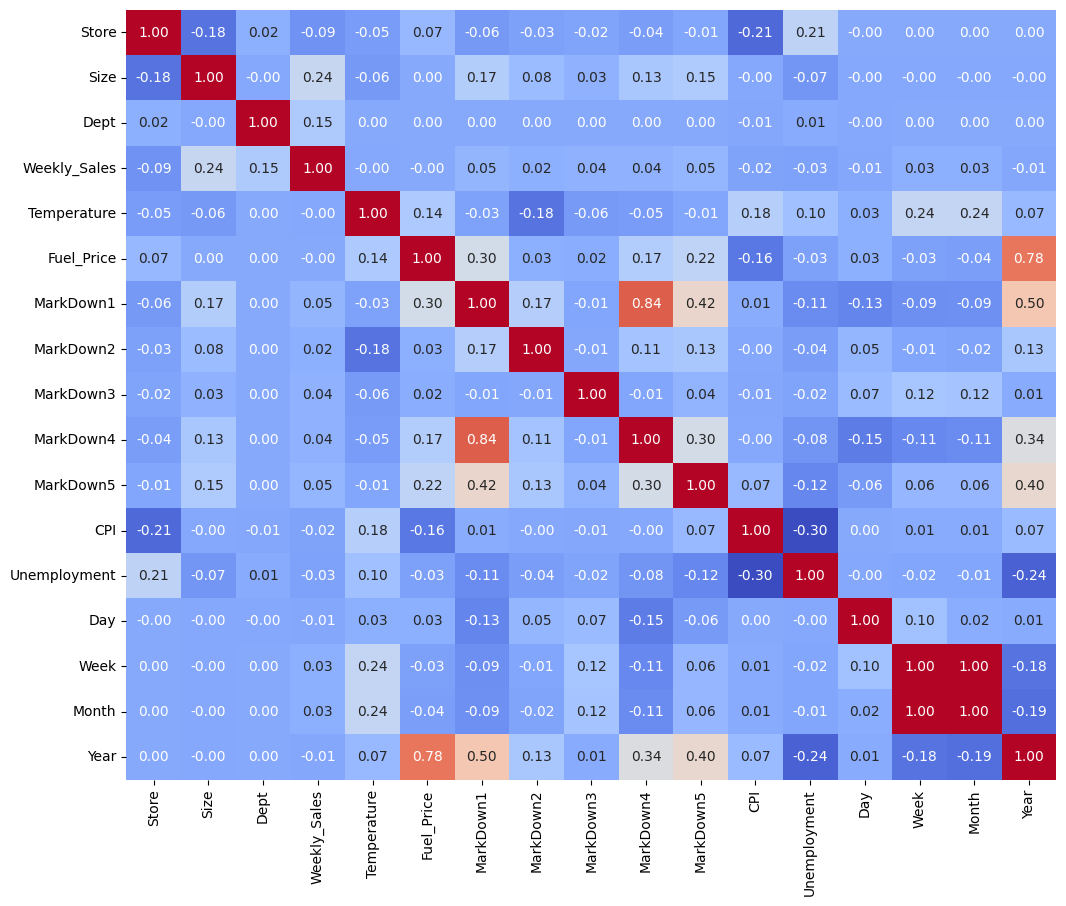

In [44]:
numerical_columns=["Store","Size","Dept","Weekly_Sales","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","Day","Week","Month","Year"]
corr=df1[numerical_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,fmt='.2f',cbar=False,cmap='coolwarm')
plt.show()

In [45]:
df1["Type"]=df1["Type"].replace({"A":1,"B":2,"C":3})

C:\Users\K R Bharath\AppData\Local\Temp\ipykernel_18236\2308916765.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Type"]=df1["Type"].replace({"A":1,"B":2,"C":3})


In [46]:
df1["IsHoliday"].unique()

array([False,  True])

In [47]:
df1["IsHoliday"].value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

In [48]:
df1["IsHoliday"]=df1["IsHoliday"].apply(lambda x:1 if x==1 else 0)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  int64         
 2   Size          421570 non-null  int64         
 3   Dept          421570 non-null  int64         
 4   Date          421570 non-null  datetime64[ns]
 5   Weekly_Sales  421570 non-null  float64       
 6   IsHoliday     421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [50]:
df1["Day"]=df1["Day"].astype("int64")
df1["Week"]=df1["Week"].astype("int64")
df1["Month"]=df1["Month"].astype("int64")
df1["Year"]=df1["Year"].astype("int64")

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  int64         
 2   Size          421570 non-null  int64         
 3   Dept          421570 non-null  int64         
 4   Date          421570 non-null  datetime64[ns]
 5   Weekly_Sales  421570 non-null  float64       
 6   IsHoliday     421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [52]:
df1

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year
0,1,1,151315,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,5,2,2010
1,1,1,151315,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,12,6,2,2010
2,1,1,151315,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,19,7,2,2010
3,1,1,151315,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,26,8,2,2010
4,1,1,151315,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,39,9,2012
421566,45,2,118221,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,40,10,2012
421567,45,2,118221,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,41,10,2012
421568,45,2,118221,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,42,10,2012


In [53]:
df2=df1.copy()

In [54]:
df2

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year
0,1,1,151315,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,5,2,2010
1,1,1,151315,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,12,6,2,2010
2,1,1,151315,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,19,7,2,2010
3,1,1,151315,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,26,8,2,2010
4,1,1,151315,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,39,9,2012
421566,45,2,118221,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,40,10,2012
421567,45,2,118221,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,41,10,2012
421568,45,2,118221,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,42,10,2012


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  int64         
 2   Size          421570 non-null  int64         
 3   Dept          421570 non-null  int64         
 4   Date          421570 non-null  datetime64[ns]
 5   Weekly_Sales  421570 non-null  float64       
 6   IsHoliday     421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [56]:
df2["Total_Markdowns"] = df2[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)
df2["Total_Markdowns"]

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
           ...   
421565    9468.01
421566    9659.00
421567    6554.03
421568    3982.42
421569    5247.26
Name: Total_Markdowns, Length: 421570, dtype: float64

In [57]:
# Add lag features (e.g., past 1 week sales, past 1 week markdown)
df2['lag_1_sales'] = df2['Weekly_Sales'].shift(1)
df2['lag_1_markdown'] = df2['Total_Markdowns'].shift(1)

In [58]:
df2['lag_1_sales'] = df2['lag_1_sales'].fillna(0)
df2['lag_1_markdown'] = df2['lag_1_markdown'].fillna(0)

In [59]:
df2

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,Day,Week,Month,Year,Total_Markdowns,lag_1_sales,lag_1_markdown
0,1,1,151315,1,2010-02-05,24924.50,0,42.31,2.572,0.00,...,0.00,211.096358,8.106,5,5,2,2010,0.00,0.00,0.00
1,1,1,151315,1,2010-02-12,46039.49,1,38.51,2.548,0.00,...,0.00,211.242170,8.106,12,6,2,2010,0.00,24924.50,0.00
2,1,1,151315,1,2010-02-19,41595.55,0,39.93,2.514,0.00,...,0.00,211.289143,8.106,19,7,2,2010,0.00,46039.49,0.00
3,1,1,151315,1,2010-02-26,19403.54,0,46.63,2.561,0.00,...,0.00,211.319643,8.106,26,8,2,2010,0.00,41595.55,0.00
4,1,1,151315,1,2010-03-05,21827.90,0,46.50,2.625,0.00,...,0.00,211.350143,8.106,5,9,3,2010,0.00,19403.54,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,2012-09-28,508.37,0,64.88,3.997,4556.61,...,3288.25,192.013558,8.684,28,39,9,2012,9468.01,467.30,19654.50
421566,45,2,118221,98,2012-10-05,628.10,0,64.89,3.985,5046.74,...,2340.01,192.170412,8.667,5,40,10,2012,9659.00,508.37,9468.01
421567,45,2,118221,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,...,3990.54,192.327265,8.667,12,41,10,2012,6554.03,628.10,9659.00
421568,45,2,118221,98,2012-10-19,760.01,0,56.47,3.969,2004.02,...,1537.49,192.330854,8.667,19,42,10,2012,3982.42,1061.02,6554.03


In [60]:
 #MARKDOWN OPTIMIZATION
# Interaction feature: Combine markdown and holiday to see if markdown works better during holidays
df2['markdown_holiday_interaction'] = df2['Total_Markdowns'] * df2['IsHoliday']
df2['markdown_impacted'] = df2['Total_Markdowns'] * df2['Weekly_Sales']

In [61]:
# Calculate the days until the next holiday
holiday_dates = df2[df2['IsHoliday'] == 1][['Date']].copy()
df2['next_holiday_date'] = holiday_dates['Date'].reindex(df2.index, method='bfill')

# Calculate days until the next holiday
df2['days_until_holiday'] = (df2['next_holiday_date'] - df2['Date']).dt.days

# Create a column to identify if sales spike within 2 weeks before a holiday
df2['pre_holiday_sales_spike'] = (df2['days_until_holiday'] <= 14).astype(int)

# Fill any NaN values for 'days_until_holiday' with 0 or appropriate logic
df2['days_until_holiday']= df2['days_until_holiday'].fillna(0)

# Drop the 'next_holiday_date' column if no longer needed
df2.drop(columns=['next_holiday_date'], inplace=True)

In [62]:
df2.drop("Total_Markdowns", axis=1, inplace=True)
df2.drop("Date", axis=1, inplace=True)

In [67]:
df2

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year,lag_1_sales,lag_1_markdown,markdown_holiday_interaction,markdown_impacted,days_until_holiday,pre_holiday_sales_spike
0,1,1,151315,1,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,5,2,2010,0.00,0.00,0.0,0.000000e+00,7.0,1
1,1,1,151315,1,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,12,6,2,2010,24924.50,0.00,0.0,0.000000e+00,0.0,1
2,1,1,151315,1,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,19,7,2,2010,46039.49,0.00,0.0,0.000000e+00,203.0,0
3,1,1,151315,1,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,26,8,2,2010,41595.55,0.00,0.0,0.000000e+00,196.0,0
4,1,1,151315,1,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,5,9,3,2010,19403.54,0.00,0.0,0.000000e+00,189.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,39,9,2012,467.30,19654.50,0.0,4.813252e+06,0.0,0
421566,45,2,118221,98,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,40,10,2012,508.37,9468.01,0.0,6.066818e+06,0.0,0
421567,45,2,118221,98,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,41,10,2012,628.10,9659.00,0.0,6.953957e+06,0.0,0
421568,45,2,118221,98,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,42,10,2012,1061.02,6554.03,0.0,3.026679e+06,0.0,0


In [68]:
df2['markdown_impacted'] = df2['markdown_impacted'].apply(lambda x: format(x, '.4f'))

In [69]:
df2

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Week,Month,Year,lag_1_sales,lag_1_markdown,markdown_holiday_interaction,markdown_impacted,days_until_holiday,pre_holiday_sales_spike
0,1,1,151315,1,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,5,2,2010,0.00,0.00,0.0,0.0000,7.0,1
1,1,1,151315,1,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,12,6,2,2010,24924.50,0.00,0.0,0.0000,0.0,1
2,1,1,151315,1,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,19,7,2,2010,46039.49,0.00,0.0,0.0000,203.0,0
3,1,1,151315,1,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,26,8,2,2010,41595.55,0.00,0.0,0.0000,196.0,0
4,1,1,151315,1,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,5,9,3,2010,19403.54,0.00,0.0,0.0000,189.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,39,9,2012,467.30,19654.50,0.0,4813252.2437,0.0,0
421566,45,2,118221,98,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,40,10,2012,508.37,9468.01,0.0,6066817.9000,0.0,0
421567,45,2,118221,98,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,41,10,2012,628.10,9659.00,0.0,6953956.9106,0.0,0
421568,45,2,118221,98,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,42,10,2012,1061.02,6554.03,0.0,3026679.0242,0.0,0


In [70]:
df2.to_csv('retail_sale_predict.csv',index=False)